In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
#%cd /content/gdrive/MyDrive/Colab\ Notebooks/3/
%cd /content/gdrive/MyDrive/Colab\ Notebooks/!Materi\ JDD\ 2024/lexicon-based-sa

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/Colab Notebooks/!Materi JDD 2024/lexicon-based-sa'
/content


In [ ]:
import numpy as np
import pandas as pd
import nltk

#download vader from nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#creating an object of sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

#reading csv file
df = pd.read_csv('reviews_2.csv')
df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,11-Oct-05,False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,7-Jan-04,False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,30-Dec-03,False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,18-Mar-04,False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,28-Aug-05,False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [ ]:
df.shape

(200, 8)

In [ ]:
#example positif
text = "Bobby is an amazing guy"
sia.polarity_scores(text)

{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.5859}

In [ ]:
#example negatif
text = "The food delivered was really very bad"
sia.polarity_scores(text)

{'neg': 0.404, 'neu': 0.596, 'pos': 0.0, 'compound': -0.6214}

In [ ]:
#creating new column scores using polarity scores function
df['scores'] = df['body'].apply(lambda body: sia.polarity_scores(str(body)))
df.head()

,asin,name,rating,date,verified,title,body,helpfulVotes,scores
0,B0000SX2UC,Janet,3,11-Oct-05,False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,"{'neg': 0.08, 'neu': 0.816, 'pos': 0.105, 'com..."
1,B0000SX2UC,Luke Wyatt,1,7-Jan-04,False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,"{'neg': 0.02, 'neu': 0.876, 'pos': 0.104, 'com..."
2,B0000SX2UC,Brooke,5,30-Dec-03,False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,"{'neg': 0.051, 'neu': 0.846, 'pos': 0.103, 'co..."
3,B0000SX2UC,amy m. teague,3,18-Mar-04,False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,"{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'comp..."
4,B0000SX2UC,tristazbimmer,4,28-Aug-05,False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,"{'neg': 0.066, 'neu': 0.814, 'pos': 0.121, 'co..."


In [ ]:
df['compound'] = df['scores'].apply(lambda score_dict:score_dict['compound'])
df.head()
df['pos'] = df['scores'].apply(lambda pos_dict:pos_dict['pos'])
df.head()
df['neg'] = df['scores'].apply(lambda neg_dict:neg_dict['neg'])
df.head()

,asin,name,rating,date,verified,title,body,helpfulVotes,scores,compound,pos,neg
0,B0000SX2UC,Janet,3,11-Oct-05,False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,"{'neg': 0.08, 'neu': 0.816, 'pos': 0.105, 'com...",0.8629,0.105,0.080
1,B0000SX2UC,Luke Wyatt,1,7-Jan-04,False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,"{'neg': 0.02, 'neu': 0.876, 'pos': 0.104, 'com...",0.8860,0.104,0.020
2,B0000SX2UC,Brooke,5,30-Dec-03,False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,"{'neg': 0.051, 'neu': 0.846, 'pos': 0.103, 'co...",0.7992,0.103,0.051
3,B0000SX2UC,amy m. teague,3,18-Mar-04,False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,"{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'comp...",0.9592,0.156,0.000
4,B0000SX2UC,tristazbimmer,4,28-Aug-05,False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,"{'neg': 0.066, 'neu': 0.814, 'pos': 0.121, 'co...",0.7745,0.121,0.066


In [ ]:
df['type'] = ''
df.loc[df.compound>0,'type'] = 'POS'
df.loc[df.compound==0,'type'] = 'NEUTRAL'
df.loc[df.compound<0,'type'] = 'NEG'
df.head(100)

,asin,name,rating,date,verified,title,body,helpfulVotes,scores,compound,pos,neg,type
0,B0000SX2UC,Janet,3,11-Oct-05,False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,"{'neg': 0.08, 'neu': 0.816, 'pos': 0.105, 'com...",0.8629,0.105,0.080,POS
1,B0000SX2UC,Luke Wyatt,1,7-Jan-04,False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,"{'neg': 0.02, 'neu': 0.876, 'pos': 0.104, 'com...",0.8860,0.104,0.020,POS
2,B0000SX2UC,Brooke,5,30-Dec-03,False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,"{'neg': 0.051, 'neu': 0.846, 'pos': 0.103, 'co...",0.7992,0.103,0.051,POS
3,B0000SX2UC,amy m. teague,3,18-Mar-04,False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,"{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'comp...",0.9592,0.156,0.000,POS
4,B0000SX2UC,tristazbimmer,4,28-Aug-05,False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,"{'neg': 0.066, 'neu': 0.814, 'pos': 0.121, 'co...",0.7745,0.121,0.066,POS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,B0029F2O3A,n. country boy,4,6-Oct-10,False,never had a problem,never had a problem have had this phone for ov...,NaN,"{'neg': 0.119, 'neu': 0.549, 'pos': 0.333, 'co...",0.8788,0.333,0.119,POS
96,B0029F2O3A,Kyle Griswold,1,29-Oct-09,False,Terrible,Has some real ram issues. It is really unusabl...,2.0,"{'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'comp...",0.6956,0.104,0.000,POS
97,B0029F2O3A,Seth B. Tropinsky,5,27-Jul-09,False,Wonderful innovative keypad,"Great phone, which has the comfort of a larger...",2.0,"{'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'comp...",0.9475,0.299,0.000,POS
98,B0029F2O3A,A-la Dawn,5,30-Mar-11,False,Best fone ever!!!,"I have had this fone for two years, and have n...",1.0,"{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compou...",0.6652,0.150,0.000,POS


In [ ]:
len = df.shape
(rows,cols) = len
pos = 0
neg = 0
neutral = 0
for i in range(0,rows):
  if df.loc[i][12] == "POS":
    pos=pos+1
  if df.loc[i][12] == "NEG":
    neg=neg+1
  if df.loc[i][12] == "NEUTRAL":
    neutral=neutral+1
print("Positive : "+str(pos) + "  Negative : " + str(neg) + "   Neutral : "+ str(neutral))

Positive : 133  Negative : 51   Neutral : 16


<ipython-input-11-6ca5fe3cbed8>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df.loc[i][12] == "POS":
<ipython-input-11-6ca5fe3cbed8>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df.loc[i][12] == "NEG":
<ipython-input-11-6ca5fe3cbed8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df.loc[i][12] == "NEUTRAL":


<Axes: title={'center': 'Sentiment Analysis (VADER)'}, xlabel='type'>

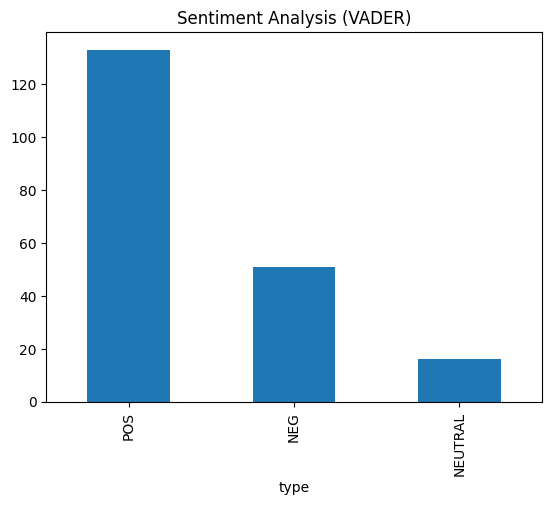

In [ ]:
df.type.value_counts().plot(kind='bar',title="Sentiment Analysis (VADER)")

TEXTBLOB

In [ ]:
from nltk.sentiment.util import *
from textblob import TextBlob
from nltk import tokenize

In [ ]:
df['body']

,body
0,I had the Samsung A600 for awhile which is abs...
1,Due to a software issue between Nokia and Spri...
2,"This is a great, reliable phone. I also purcha..."
3,"I love the phone and all, because I really did..."
4,The phone has been great for every purpose it ...
...,...
195,Put in the new battery still doesn't hold a ch...
196,Broke within two weeks not a great product used
197,"Did work, but not correctly. Shut off at will ..."
198,"Phone is fine, it works and looks good. No dam..."


In [ ]:
def get_polarity(text):
  return TextBlob(text).sentiment.polarity
df['Polarity'] = df['body'].apply(get_polarity)

In [ ]:
df['Polarity']

,Polarity
0,0.119780
1,0.119792
2,0.247381
3,0.301563
4,0.070000
...,...
195,0.136364
196,-0.400000
197,-0.200000
198,0.495833


In [ ]:
df['Sentiment_Type'] = ''
df.loc[df.Polarity>0,'Sentiment_Type'] = 'POSITIVE'
df.loc[df.Polarity==0,'Sentiment_Type'] = 'NEUTRAL'
df.loc[df.Polarity<0,'Sentiment_Type'] = 'NEGATIVE'

In [ ]:
df['Sentiment_Type']

,Sentiment_Type
0,POSITIVE
1,POSITIVE
2,POSITIVE
3,POSITIVE
4,POSITIVE
...,...
195,POSITIVE
196,NEGATIVE
197,NEGATIVE
198,POSITIVE


<Axes: title={'center': 'Sentiment Analysis (TextBlob)'}, xlabel='Sentiment_Type'>

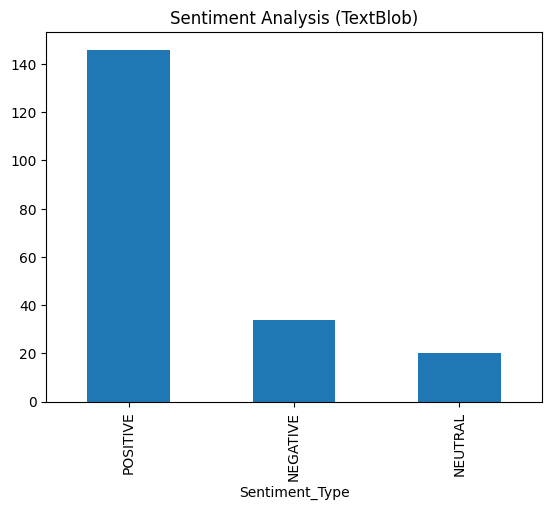

In [ ]:
df.Sentiment_Type.value_counts().plot(kind='bar',title="Sentiment Analysis (TextBlob)")